# Support Vector Machines

In [80]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import scipy

In [81]:
X = np.array([[ 0.46613554,  0.92048757],
       [-0.92129195,  0.06723639],
       [-0.15836636,  0.00430243],
       [-0.24055905, -0.87032292],
       [ 0.06245105, -0.53698416],
       [-0.2265037 , -0.43835751],
       [-0.00480479, -0.17372081],
       [-0.1525277 , -0.34399658],
       [-0.27360329,  0.35339202],
       [-0.77464508, -0.48715511],
       [-0.58724291,  0.74419972],
       [-0.97596949, -0.72172963],
       [ 0.42376225, -0.72655597],
       [ 0.96383922, -0.23371331],
       [ 0.16264643, -0.46949742],
       [-0.74294705, -0.42576417],
       [ 0.05089437, -0.20522071],
       [-0.19442744,  0.09617478],
       [-0.97102743,  0.79663992],
       [ 0.0596995 , -0.70129219],
       [-0.83934851, -0.95616033],
       [-0.38249705,  0.4973605 ],
       [ 0.3474666 ,  0.70664397],
       [ 0.35871444,  0.88679345],
       [-0.05914582,  0.23124686],
       [-0.52156643,  0.32986941],
       [-0.53579646,  0.67530208],
       [ 0.13683914, -0.96158184],
       [ 0.65904541, -0.12015303],
       [-0.69078363,  0.5615536 ],
       [ 0.47738323, -0.70919275],
       [ 0.93069669,  0.44019132],
       [ 0.19750088, -0.68869404],
       [-0.75048675, -0.18170522],
       [-0.45288395, -0.25894991],
       [-0.74644547,  0.87781953],
       [ 0.14620452,  0.56864508],
       [ 0.25719272, -0.58405476],
       [ 0.87149524,  0.01384224],
       [-0.71473576,  0.31568314],
       [-0.252637  , -0.67418371],
       [ 0.24718308,  0.95191416],
       [-0.38149953, -0.64066291],
       [-0.23112698,  0.04678807],
       [ 0.72631766,  0.7390158 ],
       [-0.91748062, -0.15131021],
       [ 0.74957917,  0.66966866],
       [ 0.76771849,  0.06662777],
       [-0.04233756, -0.91320835],
       [ 0.63840333,  0.06277738],
       [-0.78887281, -0.90311183],
       [-0.73099834, -0.69587363],
       [-0.50947652, -0.99144951],
       [ 0.14294609,  0.5474932 ],
       [ 0.4367906 ,  0.31953258],
       [-0.13970851,  0.81817884],
       [ 0.6440873 ,  0.79118775],
       [ 0.41714043, -0.66672029],
       [ 0.59283022, -0.71836746],
       [ 0.55379696,  0.98846202],
       [-0.91819517,  0.34203895],
       [ 0.02020188,  0.83696694],
       [ 0.6182918 ,  0.04254014],
       [-0.09354765, -0.30050483],
       [-0.08489545,  0.06431463],
       [-0.11886358, -0.68738895],
       [ 0.44428375,  0.18273761],
       [ 0.26486362, -0.98398013],
       [ 0.13222452,  0.91495035],
       [-0.11101656,  0.00541343],
       [-0.07696178, -0.92720555],
       [ 0.22602214,  0.56040092],
       [ 0.74227542,  0.32930104],
       [ 0.43524657,  0.35332933],
       [-0.89277607, -0.59996171],
       [-0.94836212,  0.78777302],
       [ 0.1783319 , -0.2142071 ],
       [-0.07832238, -0.25046584],
       [ 0.17611799, -0.96927832],
       [-0.95938454, -0.26504646],
       [ 0.58666766, -0.94620881],
       [-0.77336565,  0.46735057],
       [-0.94414054,  0.39044333],
       [ 0.61524645,  0.15907662],
       [-0.09855302,  0.9816656 ],
       [ 0.53937097,  0.34487634]])

In [82]:
y = ["red" if x + y > 0.3 else "green"  for [x,y] in X]
y1 = [+1 if x + y > 0.3 else -1  for [x,y] in X]

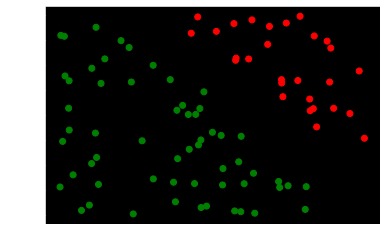

In [83]:
plt.scatter(X[:,0], X[:,1], c=y)

# SVM by *hand*

Let us use scipy.optimize.minimize to learn the SVM solution to the classification problem given above

Scipy has a quite powerful optimizer that we can use to quite easily implement the SVM primal optimization problem.

We start by noticing that the optimizer does not support non-homogeneous coordinates. We just add a column of 1s to the matrix $X$.

In [63]:
extra_column = np.ones((X.shape[0],X.shape[1]+1))
extra_column[:,:-1] = X
X = extra_column


In [56]:
print(X[:,:])

[[ 0.46613554  0.92048757  1.        ]
 [-0.92129195  0.06723639  1.        ]
 [-0.15836636  0.00430243  1.        ]
 [-0.24055905 -0.87032292  1.        ]
 [ 0.06245105 -0.53698416  1.        ]
 [-0.2265037  -0.43835751  1.        ]
 [-0.00480479 -0.17372081  1.        ]
 [-0.1525277  -0.34399658  1.        ]
 [-0.27360329  0.35339202  1.        ]
 [-0.77464508 -0.48715511  1.        ]
 [-0.58724291  0.74419972  1.        ]
 [-0.97596949 -0.72172963  1.        ]
 [ 0.42376225 -0.72655597  1.        ]
 [ 0.96383922 -0.23371331  1.        ]
 [ 0.16264643 -0.46949742  1.        ]
 [-0.74294705 -0.42576417  1.        ]
 [ 0.05089437 -0.20522071  1.        ]
 [-0.19442744  0.09617478  1.        ]
 [-0.97102743  0.79663992  1.        ]
 [ 0.0596995  -0.70129219  1.        ]
 [-0.83934851 -0.95616033  1.        ]
 [-0.38249705  0.4973605   1.        ]
 [ 0.3474666   0.70664397  1.        ]
 [ 0.35871444  0.88679345  1.        ]
 [-0.05914582  0.23124686  1.        ]
 [-0.52156643  0.32986941

We then define the objective function we want to minimize...

In [104]:
def objfun(x, *args):
    return 0.5 * np.linalg.norm(x[:,:-1])**2

The most challenging part is to define the constraints for the problem. The scipy optimizer needs them in the form:

$\textit{lb} \leq \mathbf{A} \cdot \mathbf{x} \leq \textit{ub}$

where $x$ is the current set of linear parameters we are learning and are provided by the optimizer. We then have to devise a matrix $A$ and upper bounds *lb* and *ub* to model the ones we need for the SVM problem.

Note: *lb* and *ub* can be set to $+\infty$ (using `+np.inf`) or $-\infty$ (using `-np.inf`) if necessary.

Once we have defined $A$, *lb* and *ub*, the linear constraint can be created using:

`lc = scipy.optimize.LinearConstraint(A, lb, ub)`

Finally, to invoke the optimizer we also need a starting point for the numerical search (0,0,0) would do just fine in this case

In [101]:

A = (y1*X.T).T
ub = +np.inf
lb = 1

In [102]:
lc = scipy.optimize.LinearConstraint(A,lb,ub)

In [107]:
w0 = np.zeros(X.shape[1])
w = scipy.optimize.minimize(objfun, w0, constraints=[lc])
print(w)

IndexError: too many indices for array

Let us now plot the results. A function can be plotted using matplotlib by creating the $x$ values `xs`, computing the corresponding $y$ values `ys` and using:

`plt.plot(xs,ys)`

**Note**: An easy way to create the $x$ values is:

`xs = np.linspace(a,b)`

which would create a sequence of equally spaced real numbers between `a` and `b`.

In [106]:
m = - w.x[0]/ w.x[1]
t = - w.x[2] / w.x[1]
xs = np.linspace(-1,1)
ys = xs*m + t

AttributeError: 'numpy.ndarray' object has no attribute 'x'

In [ ]:
plt.plot(xs,ys)
plt.scatter(X[:,0], X[:,1], c=y)